# Đồ Án Lập Trình cho Khoa Học Dữ Liệu

## Thành viên
| Mã số sinh viên | Học và tên                                           |
|:---------------:|:-----------------------------------------------------|
|18120225         | [Trần Thanh Phúc](https://github.com/PhucThanh)      |
|18120221         | [Nguyễn Điền Thanh Phong](https://github.com/sgrayk) |

---

## Môi trường code

In [51]:
!which python 

'which' is not recognized as an internal or external command,
operable program or batch file.


---

## Các thư viện sử dụng

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
import datetime
import re

---

## Thu thập dữ liệu

TV Shows and Movies listed on Netflix

Dataset này bao gồm tv shows và movies khả dụng trên Netflix của năm 2019. Tập dữ liệu được thu thập từ Flixable, một công cụ tìm kiếm Netflix của bên thứ ba.

Vào năm 2018, họ đã phát hành một báo cáo thú vị cho thấy số lượng chương trình truyền hình trên Netflix đã tăng gần gấp ba lần kể từ năm 2010. Số lượng phim của dịch vụ phát trực tuyến đã giảm hơn 2.000 tựa kể từ năm 2010, trong khi số lượng chương trình truyền hình của nó tăng gần gấp ba lần. Sẽ rất thú vị khi khám phá xem tất cả những thông tin chi tiết khác có thể thu được từ cùng một tập dữ liệu.


---

# Khám phá dữ liệu và tiền xử lý

In [53]:
df_movies=pd.read_csv("./datasheet/netflix_titles.csv")
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [54]:
n_rows,n_cols=df_movies.shape
print(f'Dữ liệu có {n_rows} dòng và {n_cols} cột.')

Dữ liệu có 7787 dòng và 12 cột.


Mỗi dòng là một bộ phim hoặc TV Show đã chiếu trên Netflix. Không có vấn đề mỗi dòng có ý nghĩa khác nhau.

## Kiểm tra lặp dữ liệu

In [55]:
assert(len(df_movies['show_id'].unique())==n_rows)

Ta thấy mỗi phim có một `show_id` khác nhau và số id khác nhau cũng bằng với số dòng nên không có trường hợp lặp dữ liệu.

## Ý nghĩa mỗi cột trong Dữ liệu

- **show_id**: các giá trị đơn lập giúp xác định một Chương trình.
- **type**: loại chương trình của Netflix, là Movie hoặc TV Show.
- **title**: tên chương trình được phát trên Netflix.
- **director**: danh sachs đạo diễn chương trình
- **cast**: danh sách các diễn viên trong Chương trình, ngăn cách bởi dấu ","
- **country**: tên nước sản xuất 
- **date_added**: thời gian được thêm vào Netflix
- **release_year**: năm sản xuất chương trình
- **rating**: đánh giá phim thuộc thể loại nào và mức độ của nó
- **duration**: thời lượng chương trình, có thể kéo dài trong hơn một mùa,...
- **listed_in**: danh sách thể loại chương trình
- **description**: mô tả chương trình

## Kiểm tra loại dữ liệu của mỗi cột có đơn nhất không?

In [92]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          7787 non-null   object        
 1   type             7787 non-null   object        
 2   title            7787 non-null   object        
 3   director         7787 non-null   object        
 4   cast             7069 non-null   object        
 5   country          7787 non-null   object        
 6   date_added       7777 non-null   datetime64[ns]
 7   release_year     7787 non-null   int64         
 8   rating           7787 non-null   object        
 9   duration         7787 non-null   object        
 10  listed_in        7787 non-null   object        
 11  description      7787 non-null   object        
 12  title_postfix    1263 non-null   object        
 13  title_prefix     7787 non-null   object        
 14  cast_array       7787 non-null   object 

In [57]:
def open_object_dtype(s):
    
    dtypes = set(s.apply(type))
    
    return dtypes

for col in df_movies.columns:
    print("Column %12s có kiểu dữ liệu: %s" % (col, open_object_dtype(df_movies[col])))

Column      show_id có kiểu dữ liệu: {<class 'str'>}
Column         type có kiểu dữ liệu: {<class 'str'>}
Column        title có kiểu dữ liệu: {<class 'str'>}
Column     director có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column         cast có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column      country có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column   date_added có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column release_year có kiểu dữ liệu: {<class 'int'>}
Column       rating có kiểu dữ liệu: {<class 'str'>, <class 'float'>}
Column     duration có kiểu dữ liệu: {<class 'str'>}
Column    listed_in có kiểu dữ liệu: {<class 'str'>}
Column  description có kiểu dữ liệu: {<class 'str'>}


**Vấn đề cần tiền xử lý:**
Theo thông tin ta nhận được ở trên, ta có những đánh giá sau: 
- Cột `date_added` đang có dtype là `str` và `float`. Để đúng về ý nghĩa, ta sẽ thực hiện bước tiền xử lý là chuyển sang dạng `datetime`.
- Cột `country` và `rating` có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` 
- Cột `director`, `cast` có dtype gồm 2 loại là `str` và `float`, ta sẽ tiền xử lý để thống nhất `dtype` là `str` rồi sau đó chuyển thành danh sách `numpy.array`.
- Cột `listed_in` có dtype là `str` nhưng bản thân nó là một danh sách, do đó, ta sẽ cần đưa nó về `numpy.aray`
- Cột `duration` có dtype là `str` nhưng bản thân nó bao gồm cả giá trị độ lớn và đơn vị, do đó ta cũng cần xử lý nó về 2 cột riêng.
- Hầu hết các cột có giá trị `float` là vì các cột có giá trị `nan`

## Xử lý cột Title 

Việc tách tên phim bằng dấu : có thể hữu ích trong việc tìm các phim liên quan. Chẳng hạn dòng phim Transformers thường có tên phim là `Transformer:<tên của tập phim>`. Bằng cách tách được tên phim như vậy chúng ta có thể recommend các tập khác nhau của một phim.

In [58]:
df_movies['title_postfix']=df_movies['title'].apply(lambda x:x[x.find(":")+1:] if x.find(":")>=0 else np.nan)

In [59]:
df_movies['title_prefix']=df_movies['title'].apply(lambda x:x[:x.find(":")] if x.find(":")>=0 else x)

In [60]:
df_movies.title_prefix.value_counts()[df_movies.title_prefix.value_counts()>4]

NOVA                              19
Monster High                      13
True                              10
Trailer Park Boys                  9
Kevin Hart                         8
ReMastered                         8
Krish Trish and Baltiboy           8
Jeff Dunham                        7
Dragons                            6
My Little Pony Equestria Girls     5
Little Singham                     5
Star Trek                          5
Barbie                             5
Iliza Shlesinger                   5
Super Monsters                     5
Bill Burr                          5
Transformers                       5
Katt Williams                      5
Jim Gaffigan                       5
Bill Hicks                         5
Name: title_prefix, dtype: int64

## Xử lý cột đạo diễn
Phim có nhiều đạo diễn sẽ được ngăn bởi dấu ,

In [61]:
#df_movies['director'].fillna("Unknow",inplace=True)

In [62]:
df_movies['director']=df_movies['director'].apply(lambda x:str(x).split(", "))

In [63]:
df_movies['director'].sample(6)

3905                                       [John Woo]
6592                                            [nan]
1465                                            [nan]
1745                                            [nan]
4890                                            [nan]
3602    [Pascal Blanchard, Sonia Dauger, David Dietz]
Name: director, dtype: object

Những phim không có đạo diễn sẽ là list nan: [nan]. Ta sẽ thay thế nó bằng list rỗng.

In [64]:
df_movies['director']=df_movies['director'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['director'].sample(6)

3099                  [Brian Klein]
2379                [Mike Flanagan]
2984    [Elizabeth Chai Vasarhelyi]
1914                  [Ryan Murphy]
6840               [Bruce Robinson]
4484              [Martin Scorsese]
Name: director, dtype: object

## Xử lý cột cast thành mảng diễn viên

In [65]:
df_movies['cast'].head()

0    João Miguel, Bianca Comparato, Michel Gomes, R...
1    Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2    Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3    Elijah Wood, John C. Reilly, Jennifer Connelly...
4    Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
Name: cast, dtype: object

Ta để ý tên diễn viên được cách nhau bởi `,_` (có khoảng trắng phía sau dấu ,)

In [66]:
df_movies['cast_array']=df_movies['cast'].apply(lambda x:str(x).split(", "))
#Fix nan thành mảng rỗng
df_movies['cast_array']=df_movies['cast_array'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['cast_array'].head()

0    [João Miguel, Bianca Comparato, Michel Gomes, ...
1    [Demián Bichir, Héctor Bonilla, Oscar Serrano,...
2    [Tedd Chan, Stella Chung, Henley Hii, Lawrence...
3    [Elijah Wood, John C. Reilly, Jennifer Connell...
4    [Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...
Name: cast_array, dtype: object

## Xử lý cột duration
Cột duration có 2 đơn vị là season hoặc min. Giả thiết đưa ra là những dòng có đơn vị là season là TV show, đơn vị min là phim lẻ. Ta sẽ kiểm tra điều này bằng cách đếm giá trị như sau.

In [67]:
#Số lượng Movie và TV Show
df_movies['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [68]:
#Số lượng dòng với duration có chữ min:
df_movies['duration'].apply(lambda x:x.find("min")>=0).sum()

5377

Đều là 5377 nên giả thiết của chúng ta là đúng. Chúng ta sẽ tách cột duration thành `season` thể hiện số season và `min` thể hiện số phút của phim. Mục đích điều này có thể giúp ta xử lý dễ dàng hơn các thao tác như sort theo season, min trong tương lai.

In [69]:
df_movies['min']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("min")>=0)]
df_movies['season']=df_movies['duration'][df_movies['duration'].apply(lambda x:x.find("Season")>=0)]

Ta cũng sẽ xóa chữ min và season(s) trên 2 cột ta mới tạo.

In [70]:
df_movies['min']=df_movies['min'].apply(lambda x:x[:-4] if pd.notnull(x) else np.nan)
df_movies['season']=df_movies['season'].apply(lambda x:x.replace('Seasons','').replace('Season','') if pd.notnull(x) else np.nan)

In [71]:
# Đổi kiểu dữ liệu thành số
#Float vì không bị lỗi khi chuyển NaN
df_movies['min']=df_movies['min'].astype('float') 
df_movies['season']=df_movies['season'].astype('float')

## Xử lý listed_in

Đầu tiên ta phải thông kê có tất cả bao nhiêu thể loại phim

In [72]:
# Chuyển listed_in thành mảng
df_movies['listed_in_array']=df_movies['listed_in'].apply(lambda x:str(x).split(", "))
df_movies['listed_in_array'].head()

0    [International TV Shows, TV Dramas, TV Sci-Fi ...
1                       [Dramas, International Movies]
2                [Horror Movies, International Movies]
3    [Action & Adventure, Independent Movies, Sci-F...
4                                             [Dramas]
Name: listed_in_array, dtype: object

Để kiểm tra các giá trị có thể có, ta cộng tất cả các mảng trên lại và lấy giá trị unique:

In [73]:
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

Có vẻ như nhiều thể loại phim chỉ khác nhau do có chữ TV phía trước: chẳng hạn như `Dramas` và `TV Dramas`. Ta đã có cột `type` cho biết loại phim rồi nên để thêm TV vào đây sẽ dư thừa. Chúng ta sẽ gộp các thể loại có chữ TV vào loại không có TV tương ứng (`TV Dramas` thành `Dramas`). Tuy nhiên trước khi làm điều này ta phải kiểm tra bảo đảm giả thiết chúng ta đưa ra là phù hợp. Cụ thể ta sẽ kiểm tra: 
* Có phải toàn bộ `TV Show` đều có chữ TV trong `list_in` không. Lưu ý là list_in chứa nhiều thể loại nên ta cần phải kiểm tra toàn bộ.

Mục đích của việc làm trên có thể giúp ích cho hệ thống recommendation sau này. Khi một người coi thể loại Thrillers thì chúng ta có thể không cần quan tâm Thrillers đó là movie hay là TV show.

### Loại bỏ từ TV khỏi một số thể loại

In [74]:
TV_show_count=len(df_movies[df_movies['type']=='TV Show'])
print(f'Có {TV_show_count} TV show.')

Có 2410 TV show.


In [75]:
#Ta tạo thêm m là lọc ra các dòng chỉ chứa TV show
m=df_movies[df_movies['type']=='TV Show']

In [76]:
#Số lượng phim có thể loại chứa chữ TV trong toàn bộ bảng
s1=sum(df_movies['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Có tổng cộng {s1} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


In [77]:
#Số lượng phim có thể loại chứa chữ TV trong các TV Show
s2=sum(m['listed_in_array'].apply(lambda l:any(x.find("TV")>=0 for x in l)))
print(f'Trong số các TV show, có tổng cộng {s2} dòng có chứa ít nhất 1 chữ TV trong listed_in')

Trong số các TV show, có tổng cộng 2319 dòng có chứa ít nhất 1 chữ TV trong listed_in


Ta tính 2 lần như trên để đảm bảo rằng không có phim nào (Không phải TV Show) mà có chứa chữ TV trong thể loại. Trong số 2410 TV show có 2319 show có thể loại chứa chữ TV trong đó. Như vậy ta có thể an toàn xóa đi các chữ TV trong `listed_in_array`. Sau khi xóa xong chung ta vẫn biết phim đó có phải là TV show hay không nhờ vào cột `type`.

Tuy nhiên cần lưu ý một vài thể loại sẽ không có dạng không có chữ `TV` tương ứng. Ví dụ `Reality TV` sẽ không có thể loại `Reality` tương ứng.

Ta sẽ tạo ra một dict có dạng sau:
```
{
    'TV Dramas':'Dramas',
    'TV Action & Adventure':'Action & Adventure',
    ...
}
```

In [78]:
#Tạo ra array chứa thể loại có chữ TV
TV_listed=[a for a in listed_unique if a.find("TV")>=0]

#Array chứa thể loại có chữ TV sau khi xóa TV
TV_listed_remove=[a.replace("TV ","").replace("TV","") for a in TV_listed]

#Array chứa thể loại không có chữ TV
TV_listed_noTV=[a for a in listed_unique if a.find("TV")==-1]

#Danh sách các từ có thể thay thế
to_replace_list=list(set(TV_listed_remove).intersection(TV_listed_noTV))
to_replace_list

['Sci-Fi & Fantasy', 'Action & Adventure', 'Dramas', 'Thrillers', 'Comedies']

In [79]:
#Các từ ở trên nằm tại các vị trí sau:
id_to_replace=[item[0] for item in enumerate(TV_listed_remove) if item[1] in to_replace_list]
id_to_replace

[10, 11, 12, 15, 17]

In [80]:
#Các từ cần thay thế
to_replace=[TV_listed[i] for i in id_to_replace]
to_replace

['TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers']

In [81]:
#Tạo dict map từ cần thay thế và từ thay thế
replace_dict=dict((el,el.replace("TV ","")) for el in to_replace)
replace_dict

{'TV Action & Adventure': 'Action & Adventure',
 'TV Comedies': 'Comedies',
 'TV Dramas': 'Dramas',
 'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
 'TV Thrillers': 'Thrillers'}

In [82]:
#Tiến hành thay thế
df_movies['listed_in_array']=df_movies['listed_in_array'].apply(lambda x:[replace_dict.get(i,i) for i in x])

In [83]:
#Kiểm tra lại kết quả
listed_unique=np.unique(df_movies['listed_in_array'].sum())
listed_unique

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Horror', 'TV Mysteries', 'TV Shows', 'Teen TV Shows',
       'Thrillers'], dtype='<U28')

## Xử lý Country
Cột country cũng cần xử lý đưa về mảng.

In [84]:
df_movies['country'].value_counts()

United States                                  2555
India                                           923
United Kingdom                                  397
Japan                                           226
South Korea                                     183
                                               ... 
Switzerland, France, Belgium, United States       1
United States, China, Canada                      1
South Africa, United States, Germany              1
United Kingdom, Egypt, United States              1
Australia, United Kingdom                         1
Name: country, Length: 681, dtype: int64

In [85]:
df_movies['country']=df_movies['country'].apply(lambda x:re.split(', |,',str(x)))
#Fix nan thành mảng rỗng
df_movies['country']=df_movies['country'].apply(lambda x:[] if str(x)=="['nan']" else x)
df_movies['country'].head()

0           [Brazil]
1           [Mexico]
2        [Singapore]
3    [United States]
4    [United States]
Name: country, dtype: object

## Chuyển `data_added` thành Datetime

In [86]:
df_movies['date_added']=pd.to_datetime(df_movies['date_added'])
df_movies['date_added']

0      2020-08-14
1      2016-12-23
2      2018-12-20
3      2017-11-16
4      2020-01-01
          ...    
7782   2020-10-19
7783   2019-03-02
7784   2020-09-25
7785   2020-10-31
7786   2020-03-01
Name: date_added, Length: 7787, dtype: datetime64[ns]

## Xử lý giá trị thiếu

Ta sẽ duyệt qua từng cột có giá trị thiếu và xem xét chúng ta có thể fill dữ liệu thiếu không. Sau khi xem xét thì thấy rằng các cột `director`,`cast`,`country` sẽ không thể fill được vì sẽ gây ra sai lệch lớn về mặt ý nghĩa trong dữ liệu. Ta chỉ có thể fill cho hai cột có dữ liệu thiếu là `date_added` và `rating`.

In [87]:
#Fill rating bằng mode.
df_movies['rating']=df_movies['rating'].fillna(df_movies['rating'].mode()[0])

Tìm khoảng cách trung bình giữa date_added và realease_year

In [88]:
added_release_gap=(df_movies['date_added'].dt.year-df_movies['release_year']).median()
added_release_gap

1.0

Khoảng cách trung bình giữa `date_added` và `realease_year` là 1. Nghĩa là trung bình phim được thêm vào Netflix 1 năm sau khi nó phát hành. Như vậy ta sẽ fill cho các giá trị `date_added` bị thiếu là ngày 1/1 một năm sau ngày phát hành.

In [112]:
df_movies.loc[df_movies['date_added'].isnull(),'date_added']=\
df_movies.loc[df_movies['date_added'].isnull(),'release_year'].apply(lambda x:datetime.datetime(x+1,1,1))

Kiểm tra lại dữ liệu thiếu

In [114]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   show_id          7787 non-null   object        
 1   type             7787 non-null   object        
 2   title            7787 non-null   object        
 3   director         7787 non-null   object        
 4   cast             7069 non-null   object        
 5   country          7787 non-null   object        
 6   date_added       7787 non-null   datetime64[ns]
 7   release_year     7787 non-null   int64         
 8   rating           7787 non-null   object        
 9   duration         7787 non-null   object        
 10  listed_in        7787 non-null   object        
 11  description      7787 non-null   object        
 12  title_postfix    1263 non-null   object        
 13  title_prefix     7787 non-null   object        
 14  cast_array       7787 non-null   object 

# Phân bố các giá trị và kiểm tra bất thường

### Kiểm tra ngày sản xuất và thêm vào

Ta sẽ xếp các cột `date_added` vào nhóm numeric, do đó hiện có 2 cột thuộc nhóm numeric: "release_year", "date_added".

Với mỗi cột numeric ta sẽ xem những thông tin mô tả dữ liệu.   

In [43]:
nume_col_profiles_df = df_movies.loc[:,['release_year', 'date_added']] \
                                 .agg([lambda x: pd.Series.describe(x, datetime_is_numeric=True)])

nume_col_profiles_df.columns = ['release_year', 'date_added']

nume_col_profiles_df

,release_year,date_added
count,7787.000000,7787
mean,2013.932580,2019-01-02 19:20:57.708627968
std,8.757395,NaN
min,1925.000000,2008-01-01 00:00:00
25%,2013.000000,2018-02-01 00:00:00
50%,2017.000000,2019-03-07 00:00:00
75%,2018.000000,2020-01-17 12:00:00
max,2021.000000,2021-01-16 00:00:00


Dựa vào bảng giá trị, ta có những nhận xét sơ như sau:
- Nextflix đã thêm những chương trình được sản xuất vào năm 1925 dù bộ phim đầu tiên năm 1895 và Netflix được ra đời năm 1997, vậy thì tại sao Netflix lại chọn bộ phim cũ như vậy?  
- Dữ liệu cuối cùng là năm 2021, có thể người thu thập chỉ cập nhật chọn thời điểm 2008 - 2021 nên dữ liệu có vẻ không đầy đủ. 
- Mức 25% là năm 2013, trong khi 0% là 1925, vậy những bộ phim hay chương trình vào thời điểm trước 2013 khá hạn chế, có thể sau năm 2013 thì ngành điện ảnh phát triển hơn.

**Kiểm tra bất thường:**
- Trên là 2 cột numeric nhưng chúng là có liên hệ với nhau, thông thường cột `release_year` sẽ phải có giá trị nhỏ hơn `date_added` theo như ta phỏng đoán, Netflix chờ phim sản xuất xong thì mới thêm vào kho dữ liệu, điều này có đúng không?

In [44]:
df_movies.loc[df_movies['date_added'].dt.year < df_movies['release_year'],['type','title','date_added','release_year']]

,type,title,date_added,release_year
583,TV Show,Arrested Development,2018-05-29,2019
1025,TV Show,BoJack Horseman,2019-10-25,2020
2311,TV Show,Fuller House,2019-12-06,2020
2602,Movie,Hans Teeuwen: Real Rancour,2017-07-01,2018
2741,TV Show,Hilda,2020-12-14,2021
2981,Movie,Incoming,2018-10-26,2019
3098,TV Show,Jack Taylor,2013-03-31,2016
3926,TV Show,Maradona in Mexico,2019-11-13,2020
5493,TV Show,Sense8,2016-12-23,2018
6462,TV Show,The Hook Up Plan,2019-10-11,2020


**Nhận xét:**
- Đối với những dữ liệu TV Show, sau khi kiểm tra, có thể Netflix chọn thời điểm ra mắt là tập cuối của phim, do đó, ngày phát hành sẽ là ngày sau khi thêm vào Netflix.
- Hiện tại đây là một bất thường phát hiện được và chưa có lời giải thích tốt. Chúng ta thấy khoảng cách giữa 2 năm trong trường hợp này thường chỉ khoảng 1 năm.

### Kiểm tra Director

<AxesSubplot:>

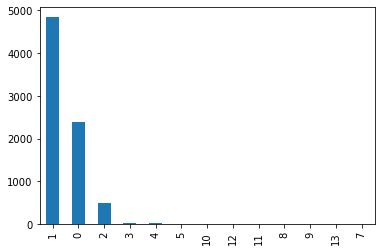

In [45]:
df_movies['director'].apply(lambda x:len(x)).value_counts().plot.bar()

Đa số phim có 1 đạo diễn. Có khá nhiều phim 0 đạo diễn, cũng là giá trị thiếu của cột.

In [46]:
# Đạo diễn tham gia nhiều phim nhất
z=df_movies['director'].sum()
#Lấy top 15
for country,times in Counter(z).most_common(15):
    print("%-20s %4.1d" % (country, times))

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Steven Spielberg       10
Shannon Hartman         9
Anurag Kashyap          9
David Dhawan            9
Kunle Afolayan          8
Justin G. Dyck          8
Umesh Mehra             8


In [47]:
# Tập hợp các đạo diễn tham gia nhiều phim nhất
df_movies['director'].apply(lambda x:str(x)).value_counts()

[]                               2389
['Raúl Campos', 'Jan Suter']       18
['Marcus Raboy']                   16
['Jay Karas']                      14
['Cathy Garcia-Molina']            13
                                 ... 
['Ramzy Bedia', 'Éric Judor']       1
['Lee Fulkerson']                   1
['Jelle de Jonge']                  1
['Bernard Rose']                    1
['Sergei Bodrov']                   1
Name: director, Length: 4050, dtype: int64

Ta thấy Jan Suter và Raúl Campos cùng làm 18 phim. Tuy nhiên tổng thể thì Raúl Campos làm tổng cộng 19 phim còn Jan Suter làm 21 phim. Có thể thấy 2 đạo diễn này đa số là làm chung phim.

Hiện tại không có gì bất thường tại cột đạo diễn ngoài việc dữ liệu thiếu

### Kiểm tra Cast

<AxesSubplot:>

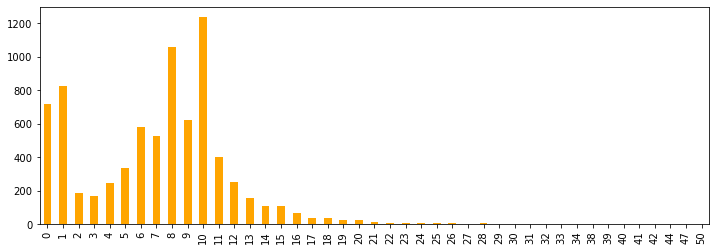

In [115]:
#Đếm số lượng diễn viên
z=df_movies['cast_array'].apply(lambda x:len(x)).value_counts()

z.sort_index().plot.bar(figsize=(12,4),color='orange')

### Kiểm tra Country
Xem phân bố dữ liệu theo số nước

<AxesSubplot:>

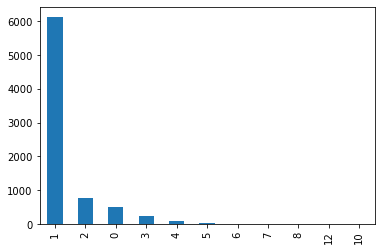

In [116]:
df_movies['country'].apply(lambda x:len(x)).value_counts().plot.bar()

Đa số phim được làm bởi 1 nước. Có phim được làm bởi tận 12 nước. Chúng ta xem nước nào làm nhiều phim nhất.

In [50]:
from collections import Counter
z=df_movies['country'].sum()

#Lấy top 15
for country,times in Counter(z).most_common(15):
    print("%-20s %4.1d" % (country, times))

United States        3297
India                 990
United Kingdom        723
nan                   507
Canada                412
France                349
Japan                 287
Spain                 215
South Korea           212
Germany               199
Mexico                154
China                 147
Australia             144
Egypt                 110
Turkey                108


Mỹ làm nhiều phim nhất sau đó đến Ấn độ,...

### Kiểm tra Season và Min

Phân bố số phút của phim

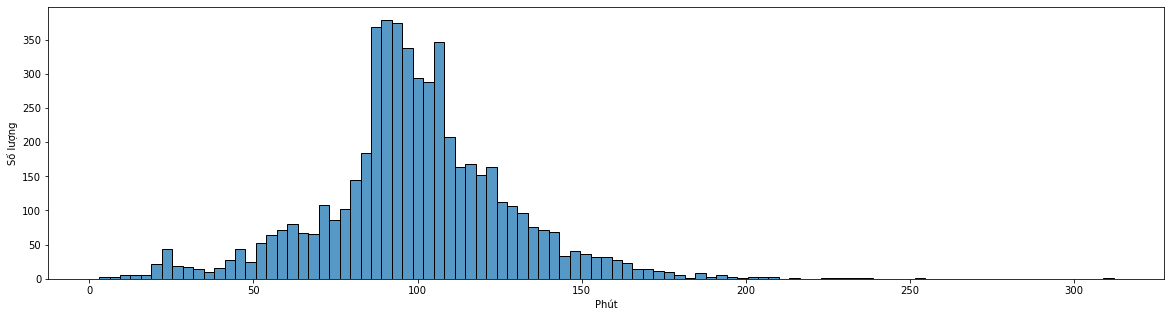

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20,5)
sns.histplot(x='min',data=df_movies)
plt.xlabel("Phút")
plt.ylabel("Số lượng")
plt.show()

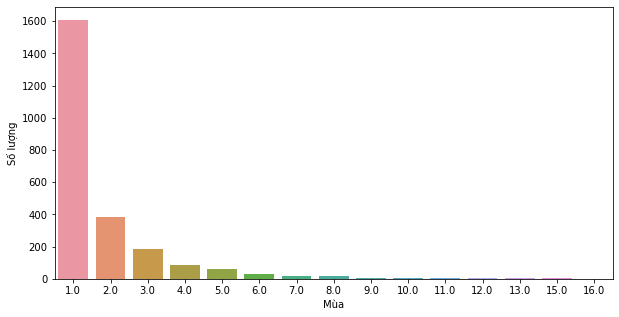

In [52]:
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.countplot(x='season',data=df_movies)
plt.xlabel("Mùa")
plt.ylabel("Số lượng")
plt.show()

**Nhận xét**
- Hầu hết các phim lẻ đều chọn khoảng thời gian 90 phút.
- Phim ngắn nhất là 3 phút và dài nhất là 312 phút, khá thú vị, ta sẽ xem xem là phim gì.


In [53]:
df_movies['min'].describe()

count    5377.000000
mean       99.307978
std        28.530881
min         3.000000
25%        86.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: min, dtype: float64

In [54]:
df_movies['season'].describe()

count    2410.000000
mean        1.775934
std         1.596359
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        16.000000
Name: season, dtype: float64

In [55]:
df_movies[(df_movies['min']==3)|(df_movies['min']==312)][['title','duration','listed_in','country']]

,title,duration,listed_in,country
957,Black Mirror: Bandersnatch,312 min,"Dramas, International Movies, Sci-Fi & Fantasy",[United States]
5605,Silent,3 min,"Children & Family Movies, Sci-Fi & Fantasy",[United States]


**Nhận xét**
* Phim có thời lượng ngắn nhất là 3 phút với 1 phim. Sau khi tìm hiểu thì đây là một bộ phim ngắn.
* Phim có thời lượng dài nhất là 312 phút với 1 phim. Đây là một phim interactive, trong đó người xem có thể tương tác với phim. Thời lượng 312 phút có thể là toàn bộ cảnh phim có thể xảy ra.
* Thời lượng phim trung bình khoảng 100 phút.
* Đối với `TV Show`, số lượng các chương trình có 1 mùa nhiều gấp đôi các mùa khác cộng lại. Để có thể duy trì nhiều mùa có vẻ khó, ta sẽ tìm hiểu `TV show` nào nhiều mùa nhất.

### Kiểm tra Description

In [56]:
## Kiểm tra description
df_movies['description'].describe()

count                                                  7787
unique                                                 7769
top       Multiple women report their husbands as missin...
freq                                                      3
Name: description, dtype: object

Có 7787 description nhưng chỉ có 7769 giá trị khác nhau. Có một nội dung xuất hiện 3 lần. Ta kiểm tra rằng có phải trùng description là trùng tên phim hay không

In [57]:
des_c=df_movies['description'].value_counts()

#desc_list danh sách các description xuất hiện nhiều hơn 1 lần
desc_list=des_c[des_c>1].index.to_list()

In [58]:
#Lấy các dòng có description xuất hiện nhiều hơn 1 lần
df1 = df_movies[df_movies.groupby(['description'])['show_id'].transform('count') > 1][['title_prefix','description']]

#Group ID để tô màu
df1['grpId']=df1.groupby('description').ngroup().add(1)
df1=df1.sort_values(by='grpId')
df1.head()

,title_prefix,description,grpId
7129,Together For Eternity,A scheming matriarch plots to cut off her disa...,1
2860,Hum Saath-Saath Hain,A scheming matriarch plots to cut off her disa...,1
4595,Oh! Baby (Tamil),A surly septuagenarian gets another chance at ...,2
4594,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at ...,2
4593,Oh! Baby,A surly septuagenarian gets another chance at ...,2


In [59]:
def rowStyle(row):
    if row.grpId %2 ==0:
        return ['background-color: #F4ECD6'] * len(row)
    return ['background-color: #A7CAB1'] * len(row)

df1.style.apply(rowStyle,axis=1)

#Tô màu cột index
df1.reset_index().rename(columns={'index': 'Index'}).style\
    .apply(rowStyle, axis=1).hide_index()

Index,title_prefix,description,grpId
7129,Together For Eternity,"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",1
2860,Hum Saath-Saath Hain,"A scheming matriarch plots to cut off her disabled stepson and his wife from the family fortune, creating a division within the clan.",1
4595,Oh! Baby (Tamil),A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
4594,Oh! Baby (Malayalam),A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
4593,Oh! Baby,A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.,2
5698,Solo,"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",3
5699,Solo,"A young Han Solo tries to settle an old score with the help of his new buddy Chewbacca, a crew of space smugglers and a cunning old friend.",3
525,Angu Vaikuntapurathu (Malayalam),"After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.",4
368,Ala Vaikunthapurramuloo,"After growing up enduring criticism from his father, a young man finds his world shaken upon learning he was switched at birth with a millionaire’s son.",4
4839,Petta (Telugu Version),"An affable, newly appointed college warden proves to be no ordinary man when an old enemy resurfaces and exposes his complicated, violent past.",5


1. Recomendation. Nhập tên phim ra 5 phim giống v. Giống là do: cùng title_prefix, quốc gia, thể loại, lọc text (nâng cao), cùng đạo diễn, cùng diễn viên,...
2. Đạo diễn đóng phim của chính họ?
3. Vẽ biểu đồ miên thể hiện tỷ lệ phim của mỗi nước qua từng năm. Trong mỗi nước có đường phân cách tỷ lệ TV Show và Movie của nước đó.

# Câu hỏi cần trả lời

## 1. *Với mỗi phim mà người dùng tìm kiếm, ta nên đề xuất thêm (recommend) các phim nào để người dùng xem?*

Việc tìm ra câu trả lời cho câu hỏi này sẽ giúp ích cho cả người dùng và nhà cung cấp dịch vụ xem phim:

- Người dùng: người dùng tìm kiếm một bộ phim để coi, sau khi coi xong có thể họ sẽ muốn coi tiếp những phim có cùng thể loại, cùng diễn viên, cùng quốc gia hay cùng đạo diễn. Sẽ rất tiện cho người dùng nếu hệ thống có thể đề xuất một danh sách phim giống với phim mà người dùng tìm kiếm.
- Nhà cung cấp dịch vụ xem phim: nếu hệ thống đề xuất tốt thì nhiều khả năng người dùng sẽ xem tiếp các bộ phim được đề xuất, thời gian sử dụng dịch vụ lâu hơn, tăng doanh thu nhà cung cấp

Hệ thống recommendation chúng ta xây dựng sẽ là một hệ thống đơn giản, khi người dùng tìm tên phim, thay vì chỉ trả về một bộ phim đó thì chúng ta sẽ trả về các bộ phim tương tự. Độ tương tự của phim sẽ được định nghĩa bằng các yếu tố: `title`, `cast`, `director`, `country`, `rating`, `listed_in`.

Đầu tiên chúng ta thấy rằng nếu người dùng tìm phim Mỹ thì có thể người dùng này thích xem phim Mỹ. Nếu người dùng tìm một bộ phim nào đó thì chúng ta có thể đề nghị thêm những bộ phim có cùng đạo diễn hay cùng diễn viên,... Đây là giả thiết của hệ thống recommendation sẽ xây dựng.

### Chuyển mảng `director`, `cast`, `country`,`listed_in` thành cột tương ứng.
Mỗi đạo diễn, mỗi diễn viên, mỗi quốc gia sẽ là một cột. Phim nào thuộc đạo diễn nào, quốc gia nào, có diễn viên nào sẽ có giá trị là 1 tại cột đó. Điều này sẽ gây bùng nổ số cột dữ liệu nhưng nó giúp ích cho việc tính toán của ta.

Do cột cast quá lớn việc tính toán có thể dẫn đến mất thời gian và không đủ bộ nhớ, nên ta sẽ chỉ lấy cast một vài người đầu. Khá may mắn là có vẻ như Netflix cũng đã sắp xếp cast của mình theo vai, những người đứng đầu sẽ thuộc vai chính trong phim.

In [60]:
#Ta tạo df_rec chỉ dùng cho việc recommend

#Lấy top 3 diễn viên trong mảng diễn viên
df_rec=df_movies.copy()
df_rec['cast_top_3']=df_rec['cast_array'].apply(lambda x:x[:4])

#Drop các cột không cần thiết
df_rec.drop(columns=['cast','cast_array','listed_in','date_added','release_year','duration',
                     'title_postfix','show_id','min','season'],inplace=True)
df_rec.head()

,type,title,director,country,rating,description,title_prefix,listed_in_array,cast_top_3
0,TV Show,3%,[],[Brazil],TV-MA,In a future where the elite inhabit an island ...,3%,"[International TV Shows, Dramas, Sci-Fi & Fant...","[João Miguel, Bianca Comparato, Michel Gomes, ..."
1,Movie,7:19,[Jorge Michel Grau],[Mexico],TV-MA,After a devastating earthquake hits Mexico Cit...,7,"[Dramas, International Movies]","[Demián Bichir, Héctor Bonilla, Oscar Serrano,..."
2,Movie,23:59,[Gilbert Chan],[Singapore],R,"When an army recruit is found dead, his fellow...",23,"[Horror Movies, International Movies]","[Tedd Chan, Stella Chung, Henley Hii, Lawrence..."
3,Movie,9,[Shane Acker],[United States],PG-13,"In a postapocalyptic world, rag-doll robots hi...",9,"[Action & Adventure, Independent Movies, Sci-F...","[Elijah Wood, John C. Reilly, Jennifer Connell..."
4,Movie,21,[Robert Luketic],[United States],PG-13,A brilliant group of students become card-coun...,21,[Dramas],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa..."


In [61]:
df_rec['type']=df_rec['type'].replace({'TV Show':0,'Movie':1})

In [62]:
df_rec=df_rec.join(pd.get_dummies(df_rec['cast_top_3'].apply(pd.Series).stack()).sum(level=0))
df_rec=df_rec.join(pd.get_dummies(df_rec['director'].apply(pd.Series).stack()).sum(level=0),rsuffix="D_")
df_rec=df_rec.join(pd.get_dummies(df_rec['country'].apply(pd.Series).stack()).sum(level=0))
df_rec=df_rec.join(pd.get_dummies(df_rec['listed_in_array'].apply(pd.Series).stack()).sum(level=0))
df_rec=df_rec.join(pd.get_dummies(df_rec['rating'].apply(pd.Series).stack()).sum(level=0))

In [63]:
df_rec.head()

,type,title,director,country,rating,description,title_prefix,listed_in_array,cast_top_3,'Najite Dede,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,0,3%,[],[Brazil],TV-MA,In a future where the elite inhabit an island ...,3%,"[International TV Shows, Dramas, Sci-Fi & Fant...","[João Miguel, Bianca Comparato, Michel Gomes, ...",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,7:19,[Jorge Michel Grau],[Mexico],TV-MA,After a devastating earthquake hits Mexico Cit...,7,"[Dramas, International Movies]","[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,23:59,[Gilbert Chan],[Singapore],R,"When an army recruit is found dead, his fellow...",23,"[Horror Movies, International Movies]","[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,9,[Shane Acker],[United States],PG-13,"In a postapocalyptic world, rag-doll robots hi...",9,"[Action & Adventure, Independent Movies, Sci-F...","[Elijah Wood, John C. Reilly, Jennifer Connell...",0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,21,[Robert Luketic],[United States],PG-13,A brilliant group of students become card-coun...,21,[Dramas],"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#Tiếp tục drop các cột không cần thiết
df_rec.drop(columns=['director','title','country','rating','description','title_prefix','cast_top_3','listed_in_array'],inplace=True)

In [65]:
df_rec.head()

,type,'Najite Dede,4Minute,50 Cent,A. Murat Özgen,A.J. Cook,A.J. LoCascio,A.K. Hangal,A.R. Rahman,A.S. Sasi Kumar,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Bảng chỉ còn lại các giá trị binary. Việc tính độ tương đồng giữa các phim bây giờ sẽ rất dễ dàng.

In [66]:
#Fill các giá trị thiếu
df_rec=df_rec.fillna(0)

In [67]:
#Lấy value của mảng
v=df_rec.values

In [68]:
def recommend(title):
    
    index=df_rec.index

    #Lọc title
    cond= df_movies['title'] == title

    #Index của phim đã lọc
    i=index[cond].to_list()

    #Các giá trị binary của phim
    value=df_rec[cond].values
    
    if value.shape[0]!=0:
        #Trừ để lấy khoảng cách giữa các phim
        result=np.abs(v-value)

        #Sum khoảng cách
        distance=np.sum(result,axis=1)

        #Điếm số tương đồng tỉ lệ nghịch với khoảng cách. 2 phim càng gần thì độ tương đồng càng cao.
        score=1/(distance+1)

        d=dict(Counter(score))

        #Dataframe để thim các phim chúng ta recommend
        df_sim=df_movies[['type','title','director','cast','country','rating','listed_in','description']].copy()
        df_sim['sim_score']=score

        #Sort theo sim_score
        df_sim=df_sim.sort_values(by='sim_score',ascending=False)

        # Ở đây chúng ta sẽ lấy [1:6]. Vì sim_score cao nhất = 1 sẽ chính là phim đang xét. 
        # Tuy nhiên để có thể xem được phim mình đang xét là phim gì thì chúng ta sẽ lấy luôn dòng này
        df_sim=df_sim.iloc[0:6] #Xem luôn phim mình đang xét
        #df_sim=df_sim.iloc[1:6] #Chỉ xem nhưng phim được recommend
        return df_sim
    print('Tên phim không tồn tại. Vui lòng chọn phim khác')

In [69]:
recommend("Money Heist")

Tên phim không tồn tại. Vui lòng chọn phim khác


In [71]:
recommend("The Conjuring")

,type,title,director,cast,country,rating,listed_in,description,sim_score
6242,Movie,The Conjuring,[James Wan],"Vera Farmiga, Patrick Wilson, Lili Taylor, Ron...",[United States],R,"Horror Movies, Thrillers","Based on true events, this spine-chiller tells...",1.000000
1542,Movie,Crip Camp: A Disability Revolution,[],NaN,[United States],R,Documentaries,A groundbreaking summer camp galvanizes a grou...,0.111111
6860,Movie,The Seven Five,[Tiller Russell],NaN,[United States],R,Documentaries,This riveting film examines the case of Mike D...,0.100000
1530,Movie,Creep,[Patrick Brice],"Mark Duplass, Patrick Brice",[United States],R,"Horror Movies, Independent Movies, Thrillers",When a cash-strapped videographer takes a job ...,0.100000
4688,Movie,Otherhood,[],NaN,"[United Kingdom, United States]",R,Comedies,"Feeling forgotten on Mother's Day, three best ...",0.100000
190,Movie,A Kind of Murder,[Andy Goddard],"Patrick Wilson, Jessica Biel, Vincent Kartheis...",[United States],R,Thrillers,"Obsessed with an unsolved murder case, a crime...",0.100000


The Conjuring là phim kinh dị, có rating R, của Mỹ, thể loại là Horror, Thrillers. Sau khi tìm kiếm ta thấy hệ thống recommend những phim cũng rating R, một số phim có cùng thể loại và các phim đều ở Mỹ.

In [72]:
recommend("Breaking Bad")

,type,title,director,cast,country,rating,listed_in,description,sim_score
1089,TV Show,Breaking Bad,[],"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",[United States],TV-MA,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...,1.000000
1945,Movie,El Camino: A Breaking Bad Movie,[Vince Gilligan],Aaron Paul,[United States],TV-MA,"Dramas, Thrillers",Fugitive Jesse Pinkman attempts to outrun his ...,0.142857
6493,TV Show,The Innocence Files,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries",The Innocence Project unravels missteps and de...,0.125000
7218,TV Show,Trial 4,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries",Charged as a teen in the 1993 killing of a Bos...,0.125000
2136,TV Show,Fear City: New York vs The Mafia,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries",Five Mafia families ruled New York with a bloo...,0.125000
1828,TV Show,Dope,[],NaN,[United States],TV-MA,"Crime TV Shows, Docuseries","Filmed from the perspectives of dealers, users...",0.125000


Người dùng tìm Breaking Bad sẽ được recommend các Crime TV Shows ở Mỹ khác. Vì Breaking Bad là một TV show về tội phạm nên có khả năng cao người dùng sẽ xem tiếp những TV show tội phạm khác.

In [73]:
recommend("Laatu")

,type,title,director,cast,country,rating,listed_in,description,sim_score
3508,Movie,Laatu,[Manav Shah],"Gagan Kokri, Aditi Sharma, Karamjit Anmol, Sar...",[India],TV-PG,"Comedies, Dramas, International Movies",A man who hopes to bring light to his village ...,1.000000
5399,Movie,Sat Shri Akaal England,[Vikram Pradhan],"Ammy Virk, Monica Gill, Karamjit Anmol, Sardar...",[India],TV-14,"Comedies, Dramas, International Movies",After several failed attempts to obtain a visa...,0.111111
1259,Movie,Chadi Jawani Budhe Nu,[],Anand,[India],TV-PG,"Comedies, International Movies, Romantic Movies","After reaching his 40th birthday, an egotistic...",0.111111
3232,Movie,Judge Singh LLB,[Atharv Baluja],"Ravinder Grewal, B.N. Sharma, Sardar Sohi, Cha...",[India],TV-PG,"Comedies, Dramas, International Movies","Framed by a politician for committing murder, ...",0.111111
311,Movie,Adhugo,[],NaN,[India],TV-14,"Comedies, International Movies, Thrillers",A fast-footed piglet named Bunty becomes an ob...,0.100000
1261,Movie,Chal Dhar Pakad,[Aatmaram Dharne],Nagesh Bhonsle,[India],TV-14,"Comedies, Dramas, International Movies",After her fat-shaming husband brings home a ne...,0.100000


Khi tìm một phim ở Ấn Độ thì hệ thống sẽ recommend hàng loạt phim ấn độ cùng thể loại khác.

In [74]:
recommend("Destiny")

,type,title,director,cast,country,rating,listed_in,description,sim_score
1719,Movie,Destiny,[Youssef Chahine],"Nour El-Sherif, Laila Elwi, Mahmoud Hemeida, S...","[France, Egypt]",TV-14,"Dramas, International Movies","In 12th-century Spain, a philosopher and his p...",1.000000
6327,Movie,The Emigrant,[Youssef Chahine],"Khaled El Nabawy, Hanan Turk, Yousra, Mahmoud ...","[Egypt, France]",TV-14,"Dramas, International Movies",Ram leaves the nomadic life and embarks on a q...,0.142857
6728,Movie,The Other,[Youssef Chahine],"Nabila Ebeid, Mahmoud Hemeida, Hanan Turk, Han...","[France, Egypt]",TV-MA,"Dramas, International Movies, Romantic Movies",When a graduate student elopes with a plucky r...,0.100000
5723,Movie,Sorry To Disturb,[Khaled Marei],"Ahmed Helmy, Mahmoud Hemeida, Menna Shalaby, D...",[Egypt],TV-14,"Dramas, International Movies","After losing his father, a genius yet troubled...",0.100000
2760,Movie,Hitler's Steel Beast,[Daniel Ablin],NaN,[France],TV-14,"Documentaries, International Movies",Trace the history of Hitler's armored private ...,0.100000
1230,Movie,Casablancas: The Man Who Loved Women,[Hubert Woroniecki],NaN,[France],TV-14,"Documentaries, International Movies",The rise and smash success of Elite modeling a...,0.100000


Đây là trường hợp khi một director làm nhiều phim thì hệ thống sẽ recommend các phim khác của director đó.

## 2. Vẽ biểu đồ tỉ lệ phim qua từng năm của 10 nước có nhiều phim nhất từ năm 2000

In [75]:
df_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,title_postfix,title_prefix,cast_array,min,season,listed_in_array
0,s1,TV Show,3%,[],"João Miguel, Bianca Comparato, Michel Gomes, R...",[Brazil],2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,NaN,3%,"[João Miguel, Bianca Comparato, Michel Gomes, ...",NaN,4.0,"[International TV Shows, Dramas, Sci-Fi & Fant..."
1,s2,Movie,7:19,[Jorge Michel Grau],"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",[Mexico],2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,19,7,"[Demián Bichir, Héctor Bonilla, Oscar Serrano,...",93.0,NaN,"[Dramas, International Movies]"
2,s3,Movie,23:59,[Gilbert Chan],"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",[Singapore],2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",59,23,"[Tedd Chan, Stella Chung, Henley Hii, Lawrence...",78.0,NaN,"[Horror Movies, International Movies]"
3,s4,Movie,9,[Shane Acker],"Elijah Wood, John C. Reilly, Jennifer Connelly...",[United States],2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",NaN,9,"[Elijah Wood, John C. Reilly, Jennifer Connell...",80.0,NaN,"[Action & Adventure, Independent Movies, Sci-F..."
4,s5,Movie,21,[Robert Luketic],"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",[United States],2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,NaN,21,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, Aa...",123.0,NaN,[Dramas]


In [76]:
df_year_country=df_movies[df_movies['type']=='Movie'][['release_year','country']].copy()
df_year_country.head(10)

,release_year,country
1,2016,[Mexico]
2,2011,[Singapore]
3,2009,[United States]
4,2008,[United States]
6,2019,[Egypt]
7,1997,[United States]
8,2019,[India]
9,2008,[India]
10,2017,[United States]
13,2018,[Thailand]


In [77]:
d=df_year_country.groupby('release_year').sum()['country'].apply(np.hstack).apply(Counter).apply(dict).to_dict()

In [78]:
#Top 10 country
z=df_movies['country'].sum()
z=Counter(z).most_common(11)
most_common_countries= [word for word, word_count in z if word!='nan']

In [79]:
df=pd.DataFrame(d).T
df=df.fillna(0)
df=df.rename_axis('year')

df=df[most_common_countries]
df=df[df.index>2000]

#Remove all 0 year
df=df.loc[~(df==0).all(axis=1)]
df.head()

,United States,India,United Kingdom,Canada,France,Japan,Spain,South Korea,Germany,Mexico
year,,,,,,,,,,
2001,18.0,8.0,3.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0
2002,24.0,9.0,4.0,2.0,3.0,1.0,0.0,0.0,4.0,0.0
2003,23.0,13.0,2.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0
2004,21.0,15.0,2.0,4.0,0.0,2.0,1.0,1.0,3.0,0.0
2005,29.0,20.0,8.0,2.0,1.0,3.0,0.0,0.0,6.0,0.0


In [80]:
#Chuẩn hóa
df=df.divide(df.sum(axis=1),axis=0)

<AxesSubplot:xlabel='year'>

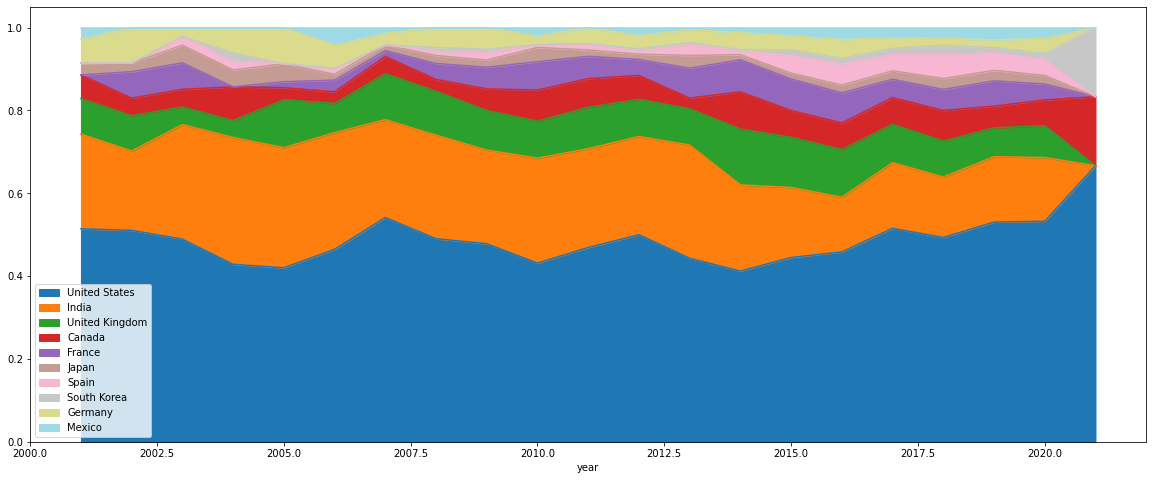

In [81]:
df.plot.area(figsize=(20,8),stacked=True,cmap='tab20')